# Module 3: Data Visualization with Matplotlib and Seaborn

Data visualization helps us understand patterns and insights quickly. In this module, we'll learn to create professional charts and graphs.

## Learning Objectives
- Create line charts, bar charts, and scatter plots
- Customize chart appearance
- Create subplots and multiple visualizations
- Compare Python visualization to PowerBI/Spotfire

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Your First Plot - Line Chart

Line charts show trends over time.

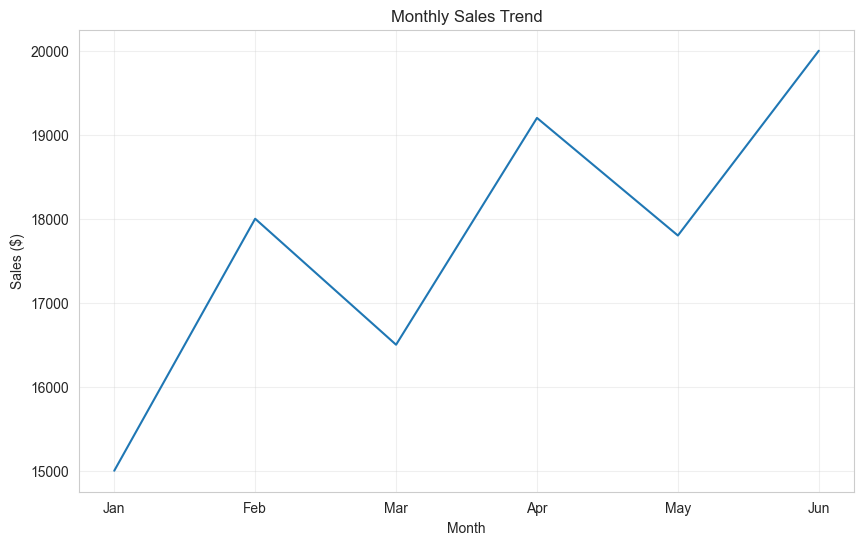

In [3]:
# Sample data: Monthly sales
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales = [15000, 18000, 16500, 19200, 17800, 20000]

# Create a simple line plot
plt.figure(figsize=(10, 6))
plt.plot(months, sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.show()

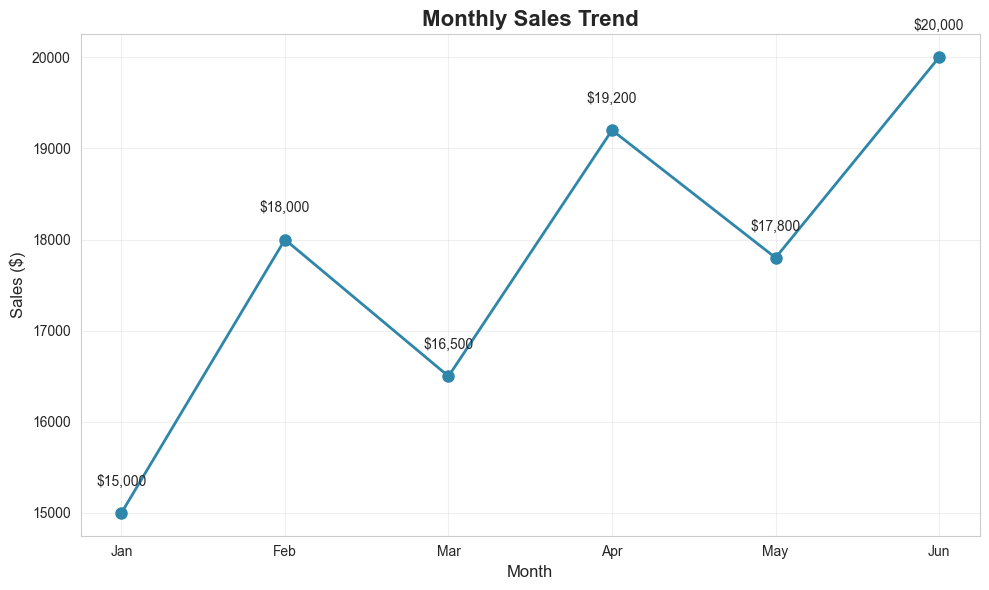

In [4]:
# Enhanced line chart with markers and colors
plt.figure(figsize=(10, 6))
plt.plot(months, sales, marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on points
for i, value in enumerate(sales):
    plt.text(i, value + 300, f'${value:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 2. Bar Charts

Bar charts compare values across categories.

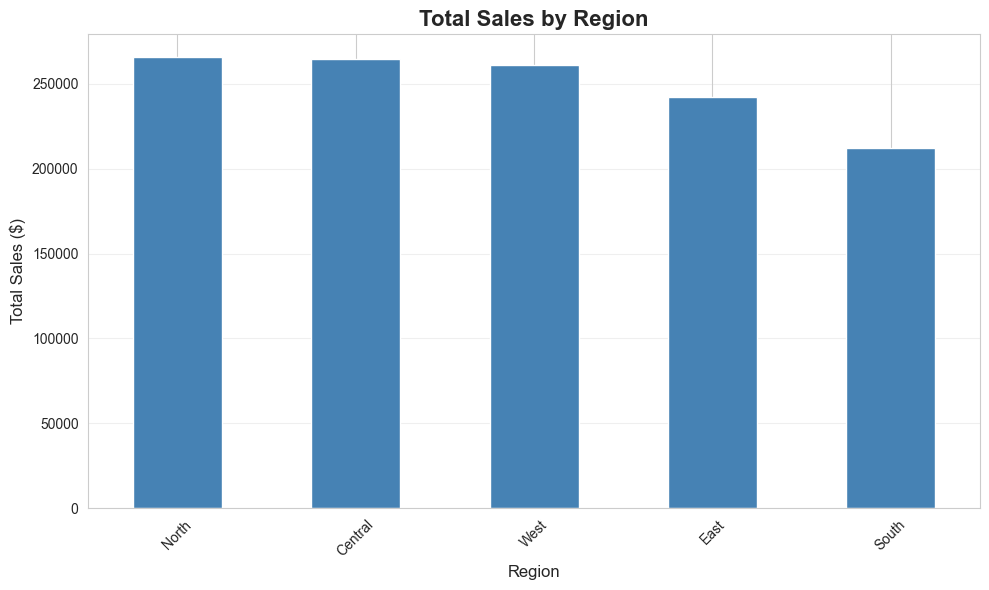

region
North      265889.05
Central    264570.70
West       261290.44
East       242503.34
South      212533.51
Name: total_amount, dtype: float64


In [5]:
# Load sales data
df_sales = pd.read_csv('../datasets/sales_data.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])

# Sales by region
region_sales = df_sales.groupby('region')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(region_sales)

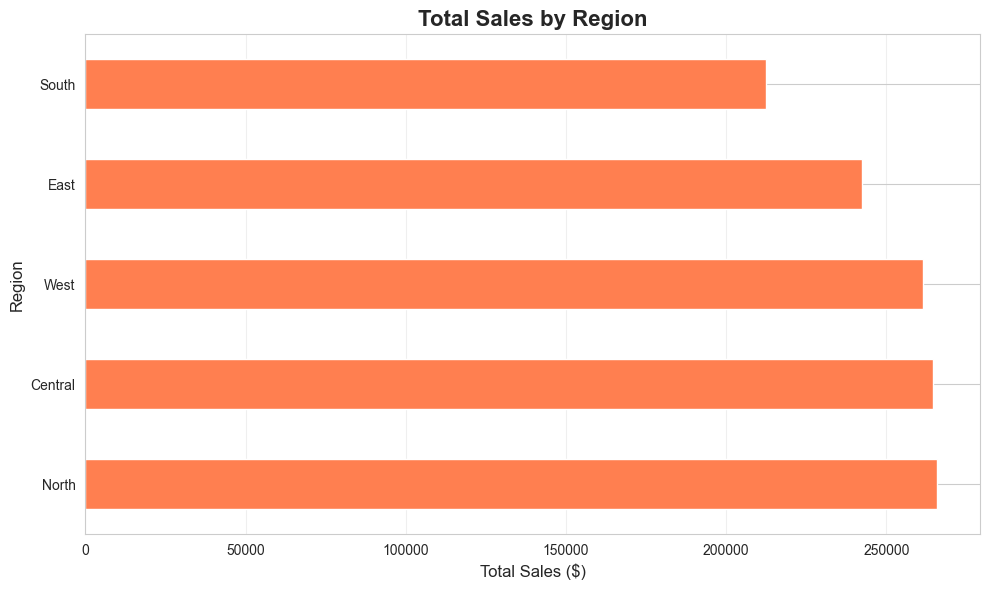

In [6]:
# Horizontal bar chart
plt.figure(figsize=(10, 6))
region_sales.plot(kind='barh', color='coral')
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/bq/0_66n0x554l7f1czjcnbskw80000gp/T/ipykernel_1695/472323371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='region', y='total_amount', palette='viridis')


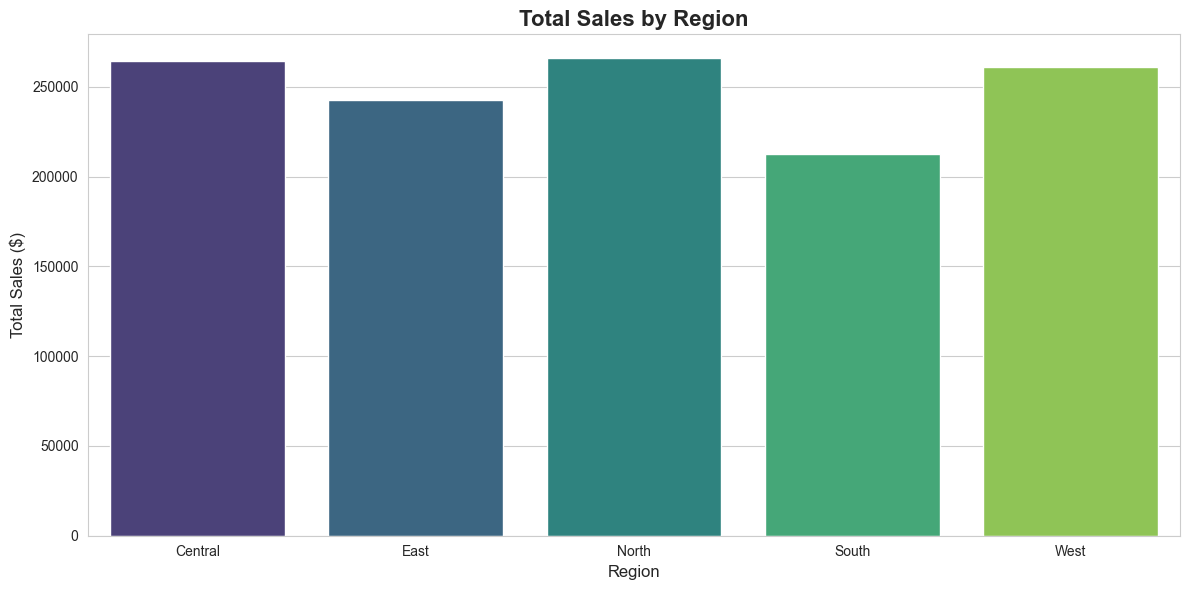

In [7]:
# Seaborn bar plot with better aesthetics
plt.figure(figsize=(12, 6))
region_data = df_sales.groupby('region')['total_amount'].sum().reset_index()
sns.barplot(data=region_data, x='region', y='total_amount', palette='viridis')
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()

## 3. Pie Charts

Show proportions and percentages.

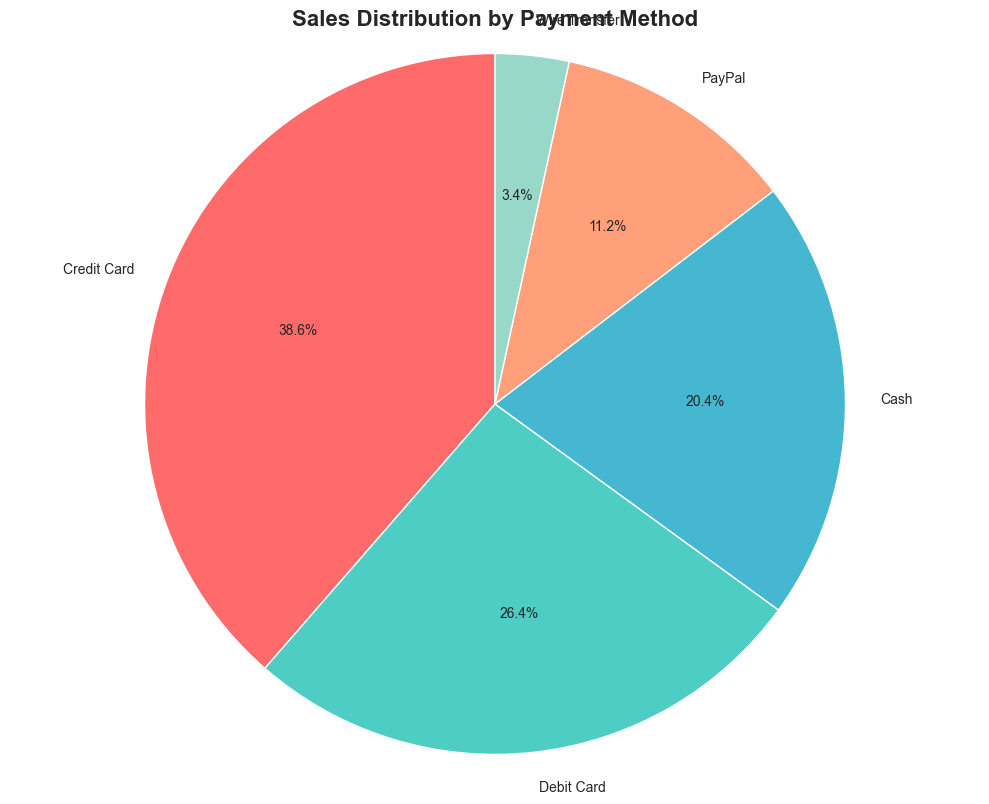

In [8]:
# Sales distribution by payment method
payment_counts = df_sales['payment_method'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Sales Distribution by Payment Method', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 4. Scatter Plots

Show relationships between two variables.

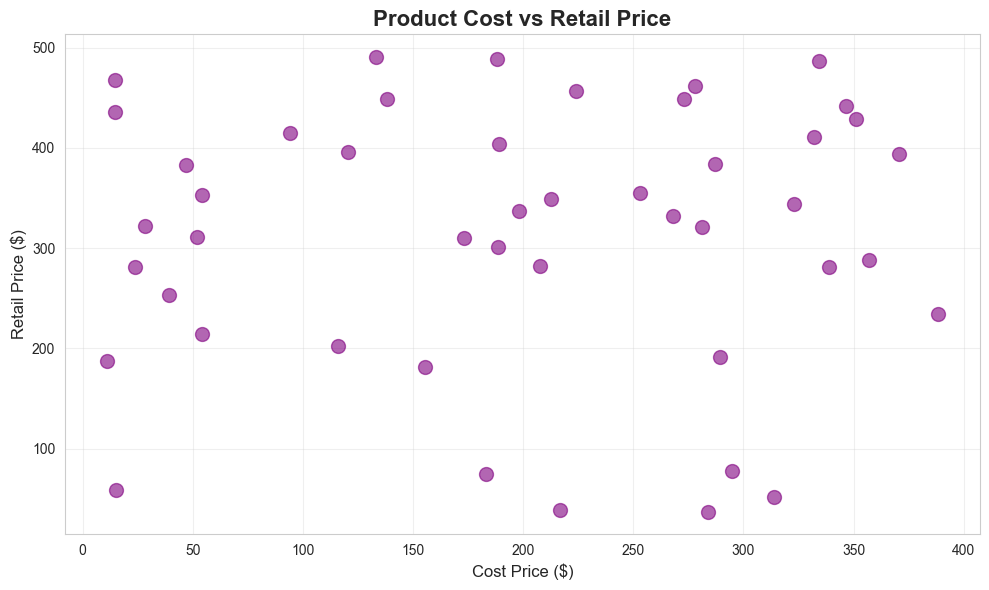

In [9]:
# Load product data
df_products = pd.read_csv('../datasets/product_catalog.csv')

# Scatter plot: Cost vs Retail Price
plt.figure(figsize=(10, 6))
plt.scatter(df_products['cost_price'], df_products['retail_price'], 
            alpha=0.6, s=100, color='purple')
plt.title('Product Cost vs Retail Price', fontsize=16, fontweight='bold')
plt.xlabel('Cost Price ($)', fontsize=12)
plt.ylabel('Retail Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

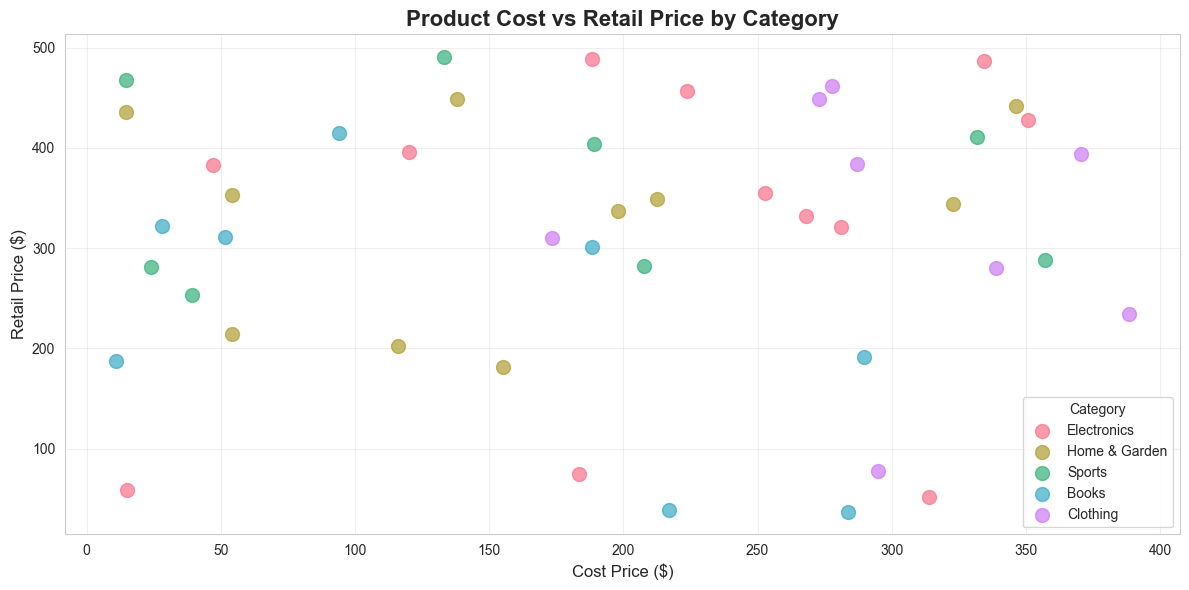

In [10]:
# Enhanced scatter plot with color by category
plt.figure(figsize=(12, 6))
categories = df_products['category'].unique()
colors = sns.color_palette('husl', len(categories))

for i, category in enumerate(categories):
    category_data = df_products[df_products['category'] == category]
    plt.scatter(category_data['cost_price'], category_data['retail_price'],
               label=category, alpha=0.7, s=100, color=colors[i])

plt.title('Product Cost vs Retail Price by Category', fontsize=16, fontweight='bold')
plt.xlabel('Cost Price ($)', fontsize=12)
plt.ylabel('Retail Price ($)', fontsize=12)
plt.legend(title='Category')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Histograms

Show distribution of values.

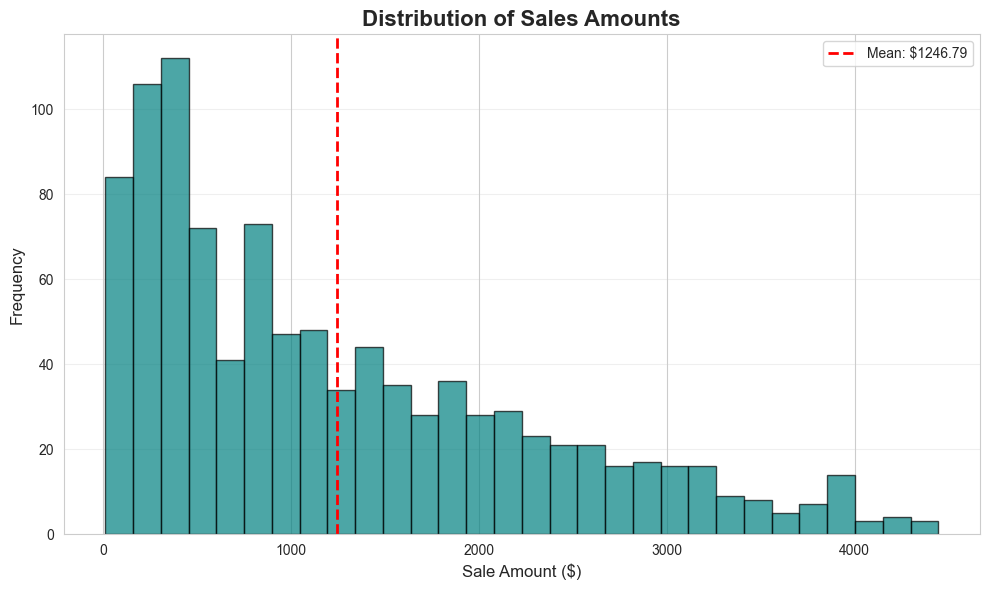

In [ ]:
# Distribution of sales amounts
plt.figure(figsize=(10, 6))
plt.hist(df_sales['total_amount'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sales Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Sale Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_sales['total_amount'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${df_sales["total_amount"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

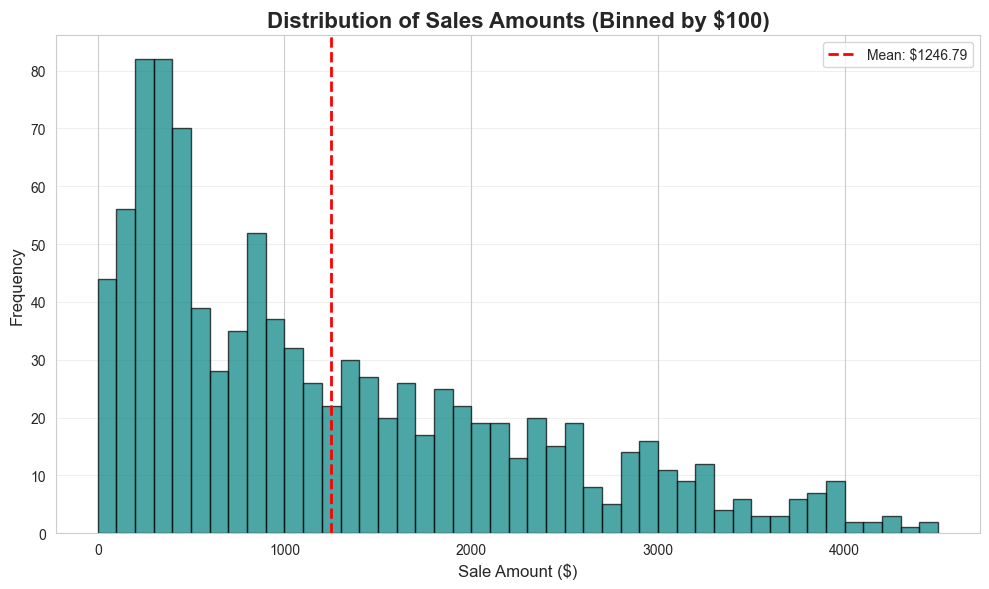

In [15]:
# Distribution of sales amounts
# Create bins with intervals of 100
max_amount = df_sales['total_amount'].max()
bins = np.arange(0, max_amount + 100, 100)  # Bins: 0-100, 100-200, 200-300, etc.

plt.figure(figsize=(10, 6))
plt.hist(df_sales['total_amount'], bins=bins, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sales Amounts (Binned by $100)', fontsize=16, fontweight='bold')
plt.xlabel('Sale Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_sales['total_amount'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${df_sales["total_amount"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

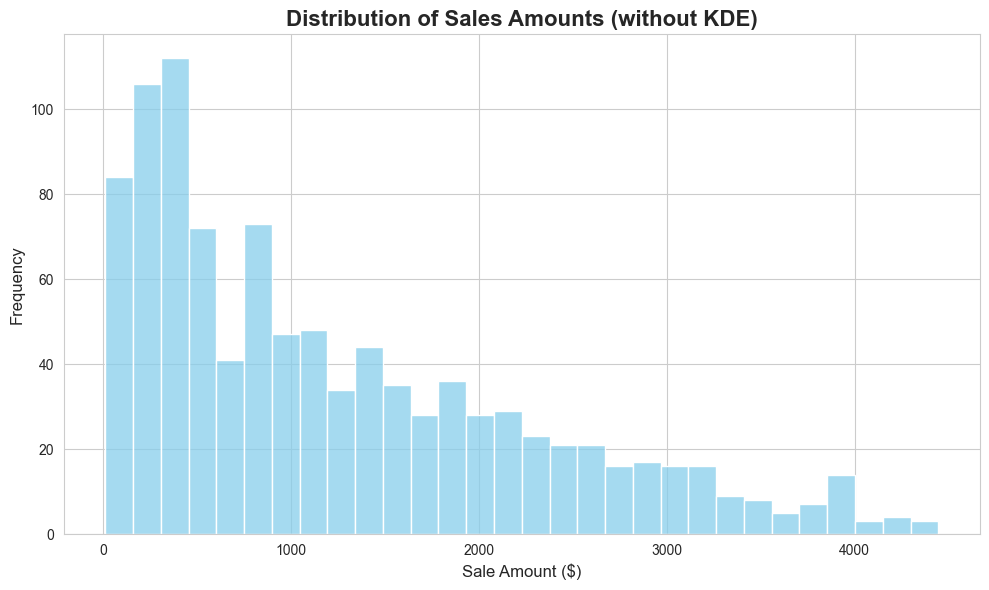

In [14]:
# Seaborn histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['total_amount'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Sales Amounts (without KDE)', fontsize=16, fontweight='bold')
plt.xlabel('Sale Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## 6. Box Plots

Show statistical distribution and identify outliers.

/var/folders/bq/0_66n0x554l7f1czjcnbskw80000gp/T/ipykernel_1695/4026461985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, x='region', y='total_amount', palette='Set2')


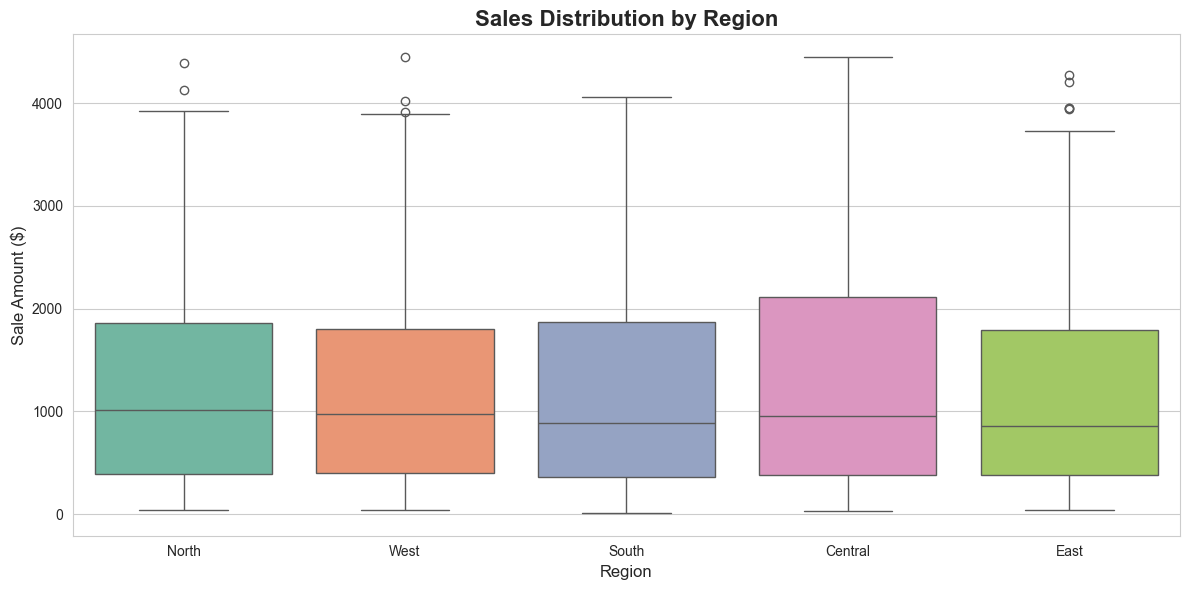

In [16]:
# Box plot of sales by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sales, x='region', y='total_amount', palette='Set2')
plt.title('Sales Distribution by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sale Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
# Box plot interpretation guide
print("Box Plot Guide:")
print("- Box shows 25th to 75th percentile (middle 50% of data)")
print("- Line in box is the median")
print("- Whiskers extend to 1.5 * IQR")
print("- Points beyond whiskers are potential outliers")

Box Plot Guide:
- Box shows 25th to 75th percentile (middle 50% of data)
- Line in box is the median
- Whiskers extend to 1.5 * IQR
- Points beyond whiskers are potential outliers


## 7. Time Series Plots

Visualize data over time.

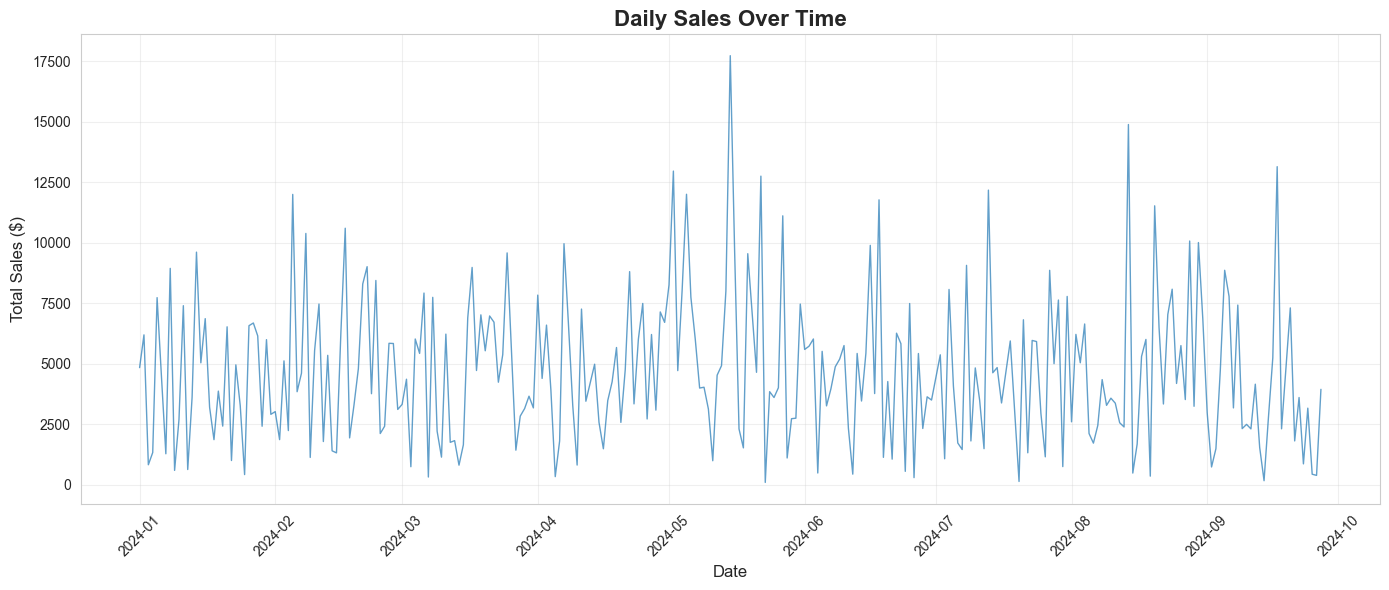

In [18]:
# Aggregate sales by date
daily_sales = df_sales.groupby('date')['total_amount'].sum().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, linewidth=1, alpha=0.7)
plt.title('Daily Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

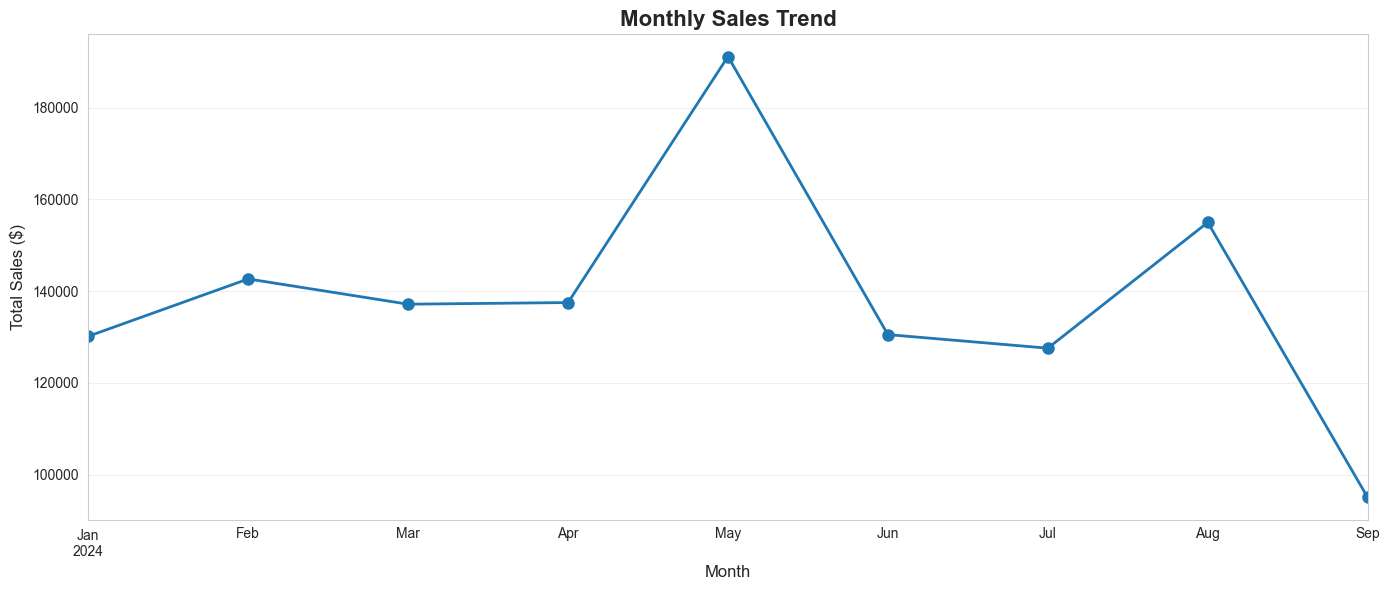

In [19]:
# Monthly trend with moving average
df_sales['month'] = df_sales['date'].dt.to_period('M')
monthly_sales = df_sales.groupby('month')['total_amount'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Multiple Subplots

Create dashboards with multiple charts.

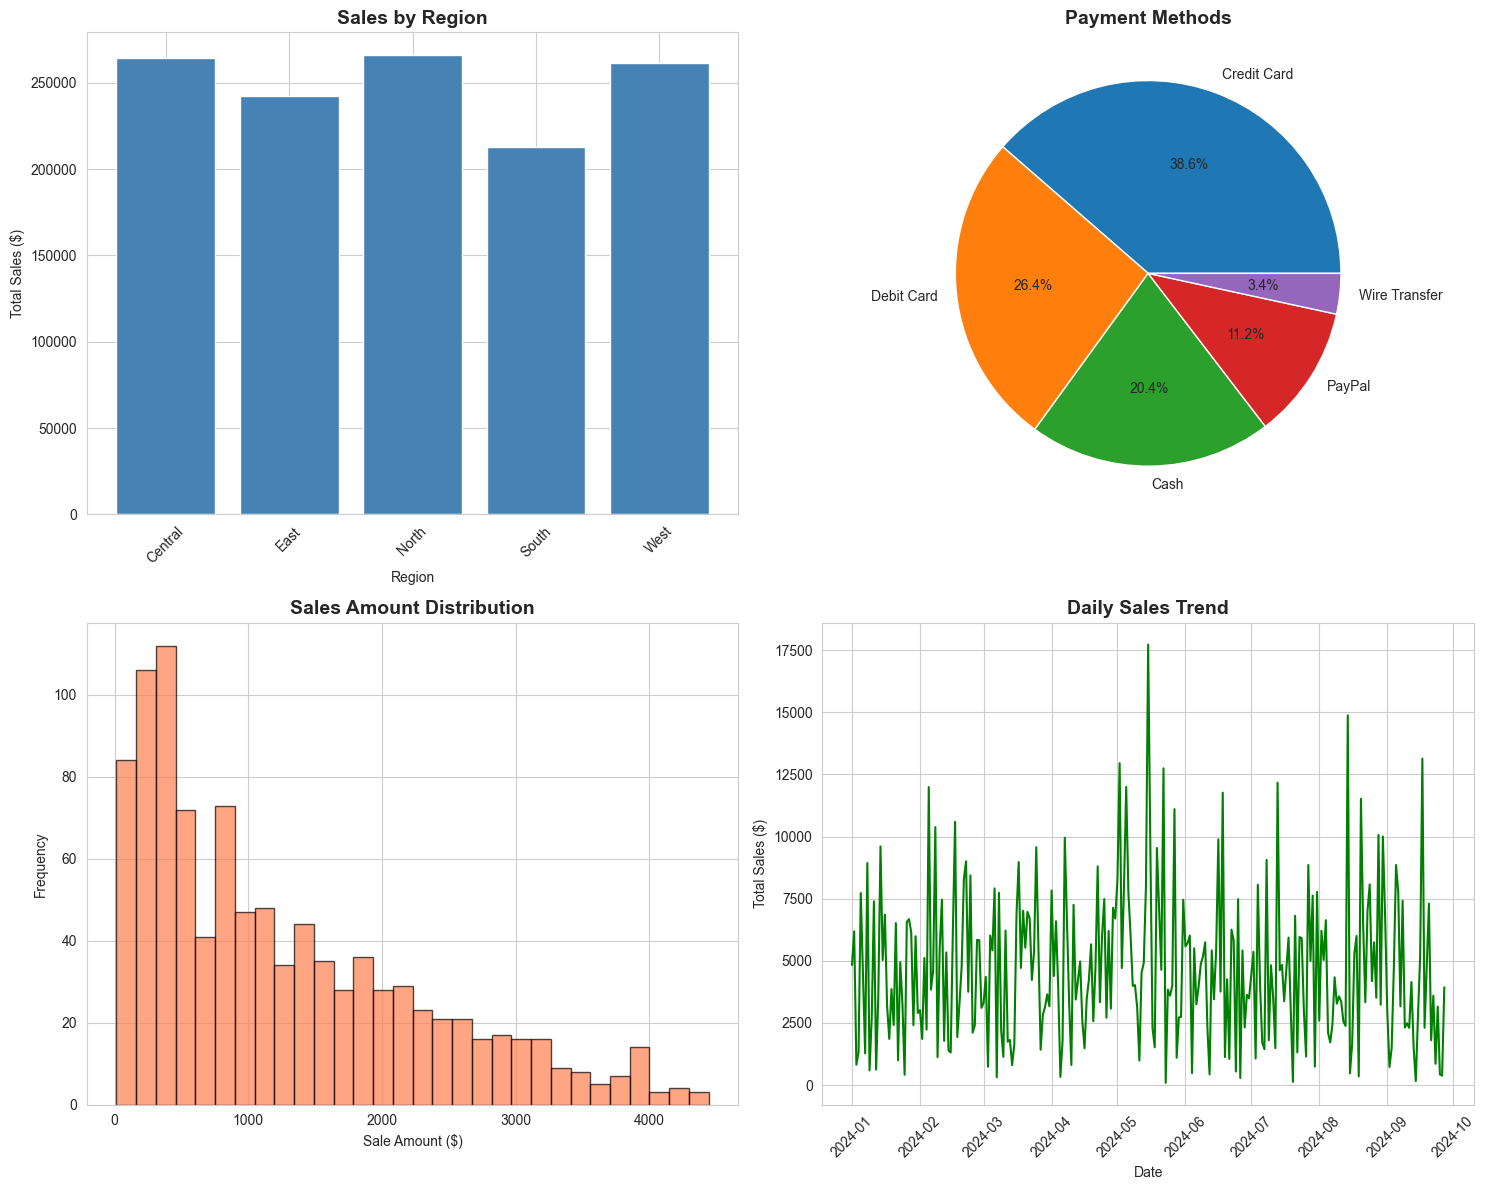

In [20]:
# Create a 2x2 dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sales by Region (Bar)
region_sales = df_sales.groupby('region')['total_amount'].sum()
axes[0, 0].bar(region_sales.index, region_sales.values, color='steelblue')
axes[0, 0].set_title('Sales by Region', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Payment Method Distribution (Pie)
payment_counts = df_sales['payment_method'].value_counts()
axes[0, 1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Payment Methods', fontsize=14, fontweight='bold')

# Plot 3: Sales Distribution (Histogram)
axes[1, 0].hist(df_sales['total_amount'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Sales Amount Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sale Amount ($)')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Daily Sales Trend (Line)
daily_sales = df_sales.groupby('date')['total_amount'].sum().sort_index()
axes[1, 1].plot(daily_sales.index, daily_sales.values, linewidth=1.5, color='green')
axes[1, 1].set_title('Daily Sales Trend', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Sales ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Heatmaps

Show correlations and patterns in data.

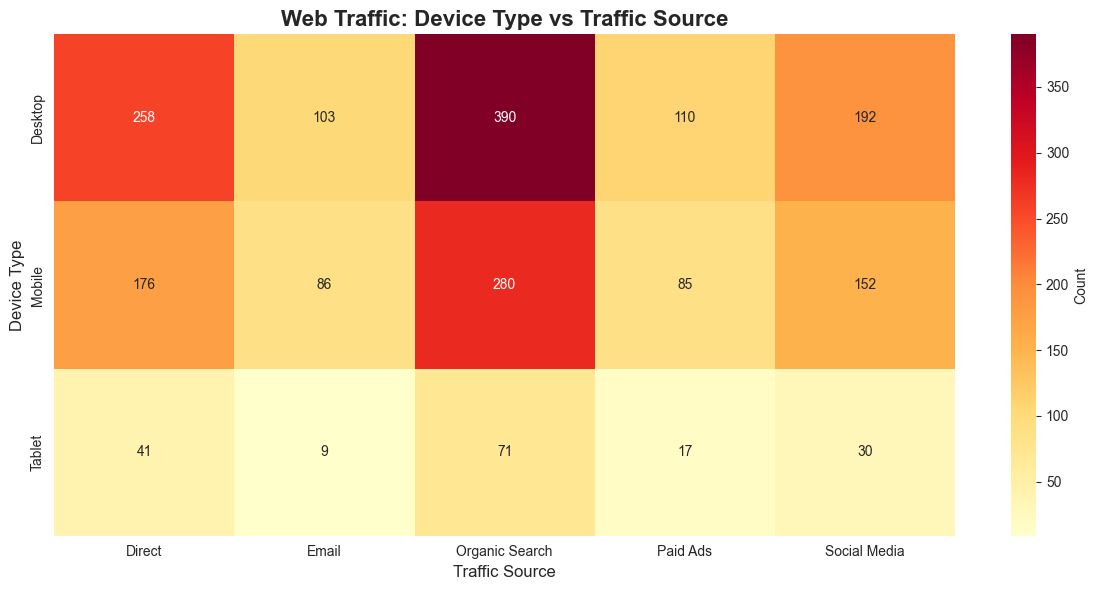

In [21]:
# Load web traffic data
df_traffic = pd.read_csv('../datasets/web_traffic.csv')

# Create a pivot table for heatmap
device_source = pd.crosstab(df_traffic['device_type'], df_traffic['traffic_source'])

plt.figure(figsize=(12, 6))
sns.heatmap(device_source, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Web Traffic: Device Type vs Traffic Source', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Source', fontsize=12)
plt.ylabel('Device Type', fontsize=12)
plt.tight_layout()
plt.show()

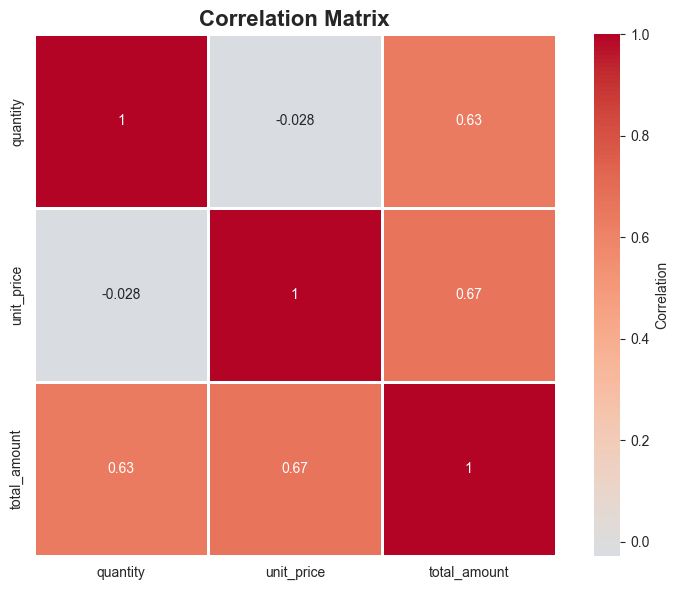

In [22]:
# Correlation heatmap
numeric_df = df_sales[['quantity', 'unit_price', 'total_amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Advanced Seaborn Plots

/var/folders/bq/0_66n0x554l7f1czjcnbskw80000gp/T/ipykernel_1695/959103349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, x='region', palette='pastel', order=df_sales['region'].value_counts().index)


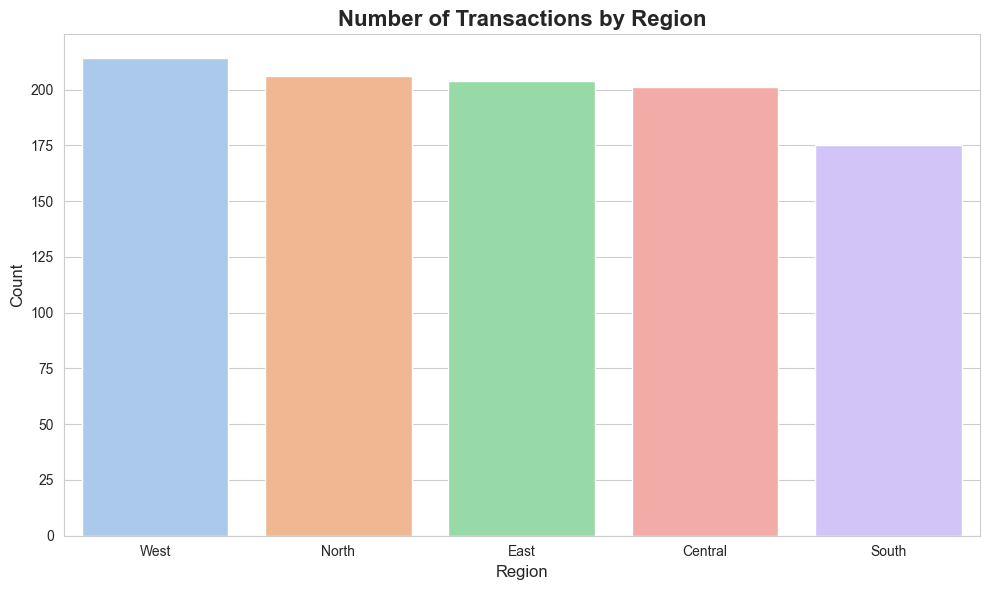

In [23]:
# Count plot - similar to bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sales, x='region', palette='pastel', order=df_sales['region'].value_counts().index)
plt.title('Number of Transactions by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/bq/0_66n0x554l7f1czjcnbskw80000gp/T/ipykernel_1695/3674176881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_sales, x='region', y='total_amount', palette='muted')


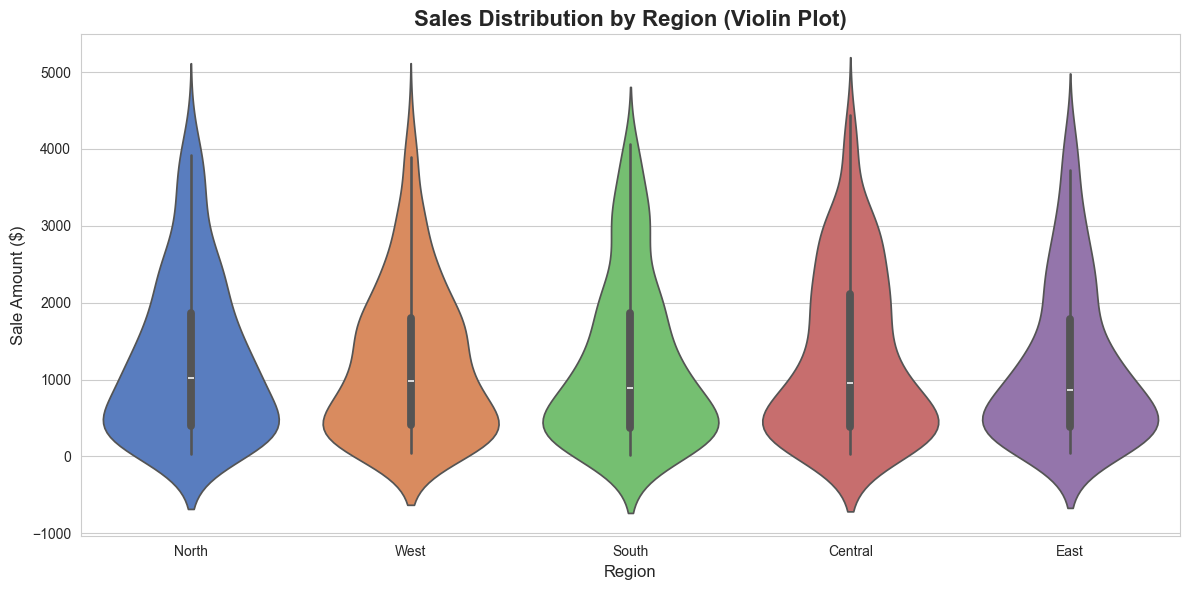

In [24]:
# Violin plot - combination of box plot and KDE
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_sales, x='region', y='total_amount', palette='muted')
plt.title('Sales Distribution by Region (Violin Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sale Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

## Comparison: Python vs PowerBI/Spotfire

### PowerBI/Spotfire
- Drag-and-drop interface
- Limited customization
- Great for quick exploration
- Interactive by default

### Python (Matplotlib/Seaborn)
- Code-based (repeatable and version-controlled)
- Unlimited customization
- Better for automated reports
- Can create interactive plots with Plotly
- Free and open-source

### When to Use Each
- **PowerBI/Spotfire**: Ad-hoc exploration, business users, dashboards
- **Python**: Automated reports, custom visualizations, data pipelines

## Practice Exercise

Create a sales dashboard!

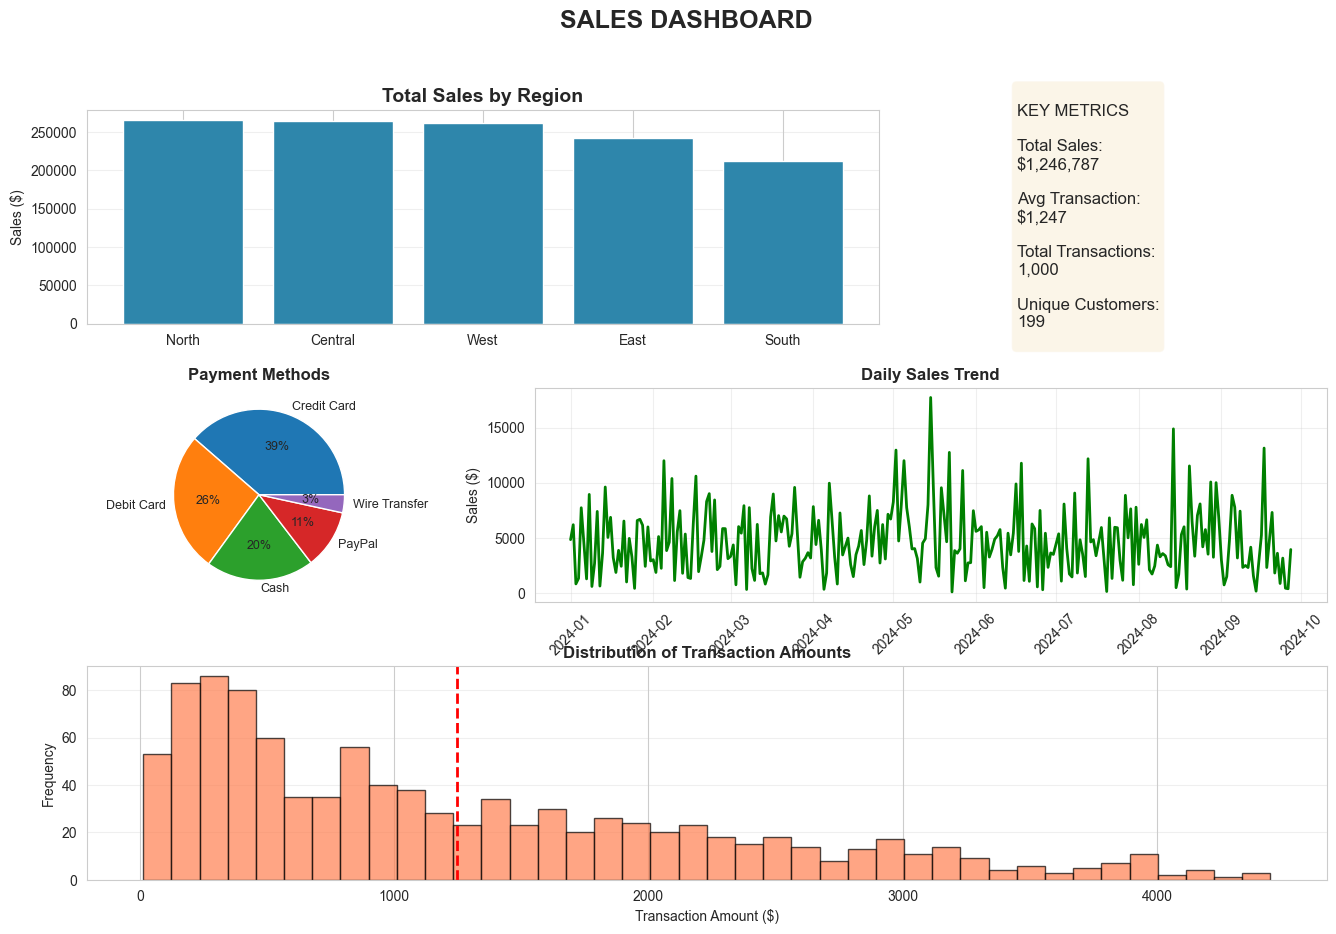

In [25]:
# Create a comprehensive sales dashboard
fig = plt.figure(figsize=(16, 10))

# Define grid
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Total Sales by Region (Bar)
ax1 = fig.add_subplot(gs[0, :2])
region_sales = df_sales.groupby('region')['total_amount'].sum().sort_values(ascending=False)
ax1.bar(region_sales.index, region_sales.values, color='#2E86AB')
ax1.set_title('Total Sales by Region', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sales ($)')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Key Metrics (Text)
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
metrics_text = f"""
KEY METRICS

Total Sales:
${df_sales['total_amount'].sum():,.0f}

Avg Transaction:
${df_sales['total_amount'].mean():,.0f}

Total Transactions:
{len(df_sales):,}

Unique Customers:
{df_sales['customer_id'].nunique():,}
"""
ax2.text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Plot 3: Payment Methods (Pie)
ax3 = fig.add_subplot(gs[1, 0])
payment_counts = df_sales['payment_method'].value_counts()
ax3.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.0f%%', 
        textprops={'fontsize': 9})
ax3.set_title('Payment Methods', fontsize=12, fontweight='bold')

# Plot 4: Sales Trend (Line)
ax4 = fig.add_subplot(gs[1, 1:])
daily_sales = df_sales.groupby('date')['total_amount'].sum().sort_index()
ax4.plot(daily_sales.index, daily_sales.values, linewidth=2, color='green')
ax4.set_title('Daily Sales Trend', fontsize=12, fontweight='bold')
ax4.set_ylabel('Sales ($)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Plot 5: Sales Distribution (Histogram)
ax5 = fig.add_subplot(gs[2, :])
ax5.hist(df_sales['total_amount'], bins=40, color='coral', edgecolor='black', alpha=0.7)
ax5.axvline(df_sales['total_amount'].mean(), color='red', linestyle='--', linewidth=2)
ax5.set_title('Distribution of Transaction Amounts', fontsize=12, fontweight='bold')
ax5.set_xlabel('Transaction Amount ($)')
ax5.set_ylabel('Frequency')
ax5.grid(axis='y', alpha=0.3)

plt.suptitle('SALES DASHBOARD', fontsize=18, fontweight='bold', y=0.98)
plt.show()

## Summary

In this module, you learned:

✓ **Line Charts**: Show trends over time  
✓ **Bar Charts**: Compare categories  
✓ **Pie Charts**: Show proportions  
✓ **Scatter Plots**: Show relationships  
✓ **Histograms**: Show distributions  
✓ **Box Plots**: Show statistical summaries  
✓ **Subplots**: Create dashboards  
✓ **Heatmaps**: Show patterns in categorical data  
✓ **Customization**: Colors, labels, styles

### Quick Reference

```python
# Line plot
plt.plot(x, y)

# Bar chart
plt.bar(x, y)  # or df.plot(kind='bar')

# Scatter plot
plt.scatter(x, y)

# Histogram
plt.hist(data, bins=30)

# Seaborn
sns.barplot(data=df, x='col1', y='col2')
sns.boxplot(data=df, x='category', y='value')
```

Next up: **Module 4 - Advanced Pandas Operations** where we'll learn groupby, merge, and pivot tables!